<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2021/Lab06_FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Extraction
- Radiomics는 의료영상으로부터 미리 정의한 다양한 feature를 추출하여 다양한 목적으로 활양하는 분야로, CT, MRI, PET 등의 의료영상을 통한 연구에 매우 활발하게 적용이 되고 있다. 
- 본 실습에서는 pyradiomics를 이용하여 nifti image/label 로부터 radiomics feature를 추출하는 과정을 연습합니다.
- 보다 자세한 내용은 아래 사이트들을 참고합니다.
  - https://github.com/AIM-Harvard/pyradiomics
  - https://www.radiomics.io/pyradiomics.html
  - https://doi.org/10.1158/0008-5472.CAN-17-0339
  


In [1]:
!python -m pip install pyradiomics

In [2]:
from __future__ import print_function
import six
import os  # needed navigate the system to get the input data

import radiomics
from radiomics import featureextractor  # This module is used for interaction with pyradiomics
import SimpleITK as sitk

import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path0 = '/content/drive/MyDrive/data/brats18/brats18_train' # replace your data path
dpiv = 80
path_list = glob.glob(os.path.join(path0,'Brats18*'))
len(path_list)

100

In [21]:
# First define the settings
settings = {}
settings['binWidth'] = 10
settings['sigma'] = 1
settings['label'] = 4

# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)  # ** 'unpacks' the dictionary in the function call

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 4, 'additionalInfo': True, 'binWidth': 10, 'sigma': 1}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [22]:
train_ind = np.arange(0,10)
data_dicts = [
    {
        "image": os.path.join(path_list[idx],
                                    "t1ce.nii.gz"),
        "label": os.path.join(path_list[idx],
                                    "seg.nii.gz"),
    }
    for idx in train_ind
]
train_files =  data_dicts
train_files[3]

{'image': '/content/drive/MyDrive/data/brats18/brats18_train/Brats18_CBICA_APR_1/t1ce.nii.gz',
 'label': '/content/drive/MyDrive/data/brats18/brats18_train/Brats18_CBICA_APR_1/seg.nii.gz'}

In [23]:
n1=1
imagePath1 = train_files[n1]['image']
maskPath1 = train_files[n1]['label']
print(imagePath1)
print(maskPath1)

/content/drive/MyDrive/data/brats18/brats18_train/Brats18_CBICA_ASA_1/t1ce.nii.gz
/content/drive/MyDrive/data/brats18/brats18_train/Brats18_CBICA_ASA_1/seg.nii.gz


In [24]:
image1 = sitk.ReadImage(imagePath1)
label1 = sitk.ReadImage(maskPath1)

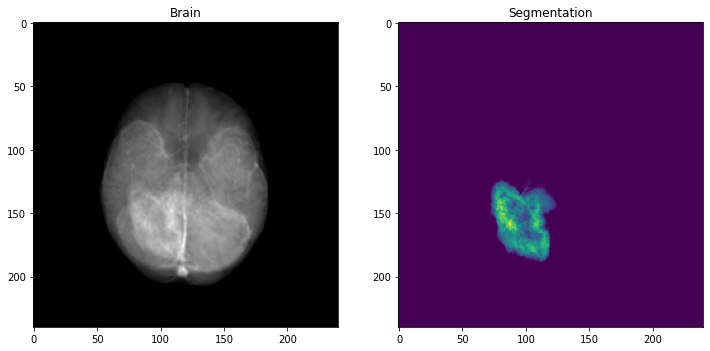

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.sum(sitk.GetArrayFromImage(image1),axis=0), cmap="gray")
plt.title("Brain")
plt.subplot(1,2,2)
plt.imshow(np.sum(sitk.GetArrayFromImage(label1)==4,axis=0))        
plt.title("Segmentation")
plt.show()

In [26]:
n2=8
imagePath2 = train_files[n2]['image']
maskPath2 = train_files[n2]['label']
print(imagePath2)
print(maskPath2)

/content/drive/MyDrive/data/brats18/brats18_train/Brats18_TCIA04_192_1/t1ce.nii.gz
/content/drive/MyDrive/data/brats18/brats18_train/Brats18_TCIA04_192_1/seg.nii.gz


In [27]:
image2 = sitk.ReadImage(imagePath2)
label2 = sitk.ReadImage(maskPath2)

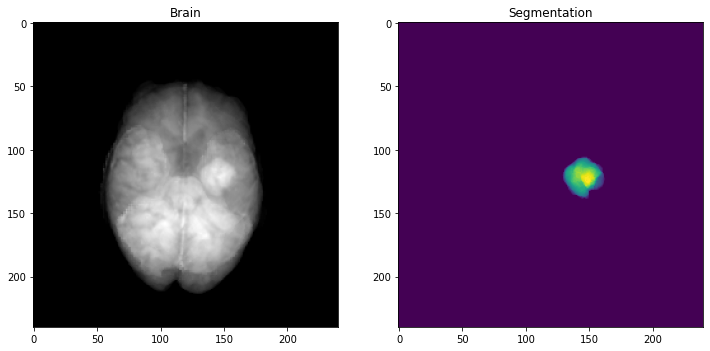

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.sum(sitk.GetArrayFromImage(image2),axis=0), cmap="gray")
plt.title("Brain")
plt.subplot(1,2,2)
plt.imshow(np.sum(sitk.GetArrayFromImage(label2)==4,axis=0))        
plt.title("Segmentation")
plt.show()

In [29]:
result_1 = extractor.execute(imagePath1, maskPath1)
result_2 = extractor.execute(imagePath2, maskPath2)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [30]:
print('volume of #1:',result_1['original_shape_VoxelVolume'])
print('volume of #2:',result_2['original_shape_VoxelVolume'])


volume of #1: 40108.0
volume of #2: 15090.0


In [31]:
#print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result_1):
    print('\t', key, ':', value)


Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.19.5
	 diagnostics_Versions_SimpleITK : 2.1.1
	 diagnostics_Versions_PyWavelet : 1.1.1
	 diagnostics_Versions_Python : 3.7.12
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 4, 'additionalInfo': True, 'binWidth': 10, 'sigma': 1}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : ffe8d5a8ba9e164852b073f2a4acf6164f70a7f1
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (1.0, 1.0, 1.0)
	 diagnostics_Image-original_Size : (240, 240, 155)
	 diagnostics_Image-original_Mean : 80.23258691756273
	 diagnostics_Image-ori

In [32]:
# Make an array of the values
feature_1 = np.array([])
feature_2 = np.array([])
feature_name = np.array([])
for key, value in six.iteritems(result_1):
    if key.startswith("original_shape"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature_1 = np.append ( feature_1, result_1[key])
        feature_2 = np.append ( feature_2, result_2[key])

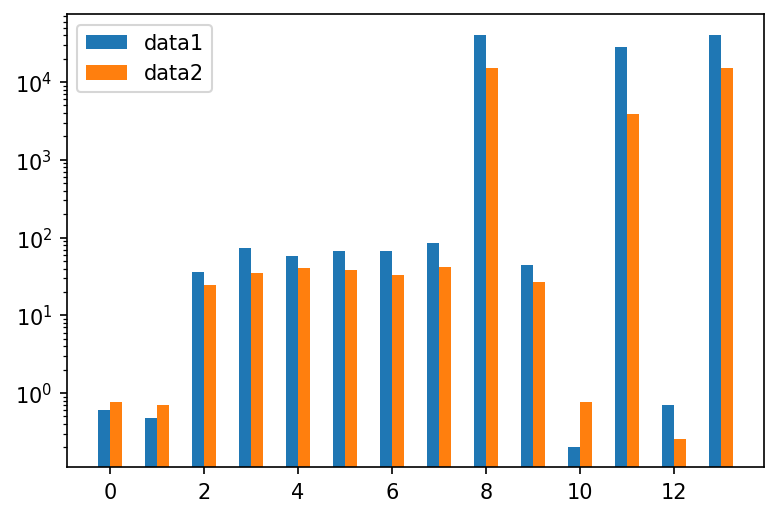

In [33]:
plt.figure(dpi=150)
plt.bar(np.arange(-.125,len(feature_1)-.125),feature_1,width=0.25)
plt.bar(np.arange(0.125,len(feature_2)+0.125),feature_2,width=0.25)
plt.yscale('log')
plt.legend(['data1','data2'])
plt.show()

In [34]:
import pandas as pd

In [35]:
T = pd.DataFrame({'feature_name':feature_name,path_list[n1].split('/')[-1]:feature_1,path_list[n2].split('/')[-1]:feature_2})
T

,feature_name,Brats18_CBICA_ASA_1,Brats18_TCIA04_192_1
0,Elongation,0.602204,0.770123
1,Flatness,0.481350,0.706205
2,LeastAxisLength,35.772041,24.652105
3,MajorAxisLength,74.316139,34.907843
4,Maximum2DDiameterColumn,58.600341,40.360872
5,Maximum2DDiameterRow,66.573268,38.013156
6,Maximum2DDiameterSlice,67.082039,33.060551
7,Maximum3DDiameter,86.313383,41.809090
8,MeshVolume,40336.416667,15037.291667
9,MinorAxisLength,44.753481,26.883349


In [36]:
T.to_csv(os.path.join(path0,'radiomics_features.csv'))